In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import dataset

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [8]:
#df.isnull().sum()
#df.info()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

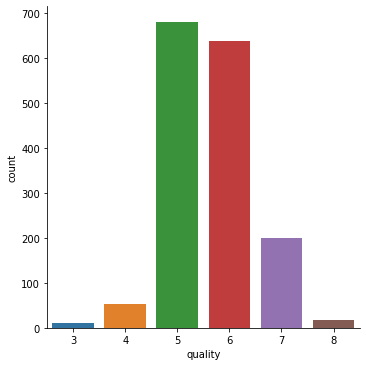

In [11]:
sns.catplot(x='quality', data = df, kind = 'count')

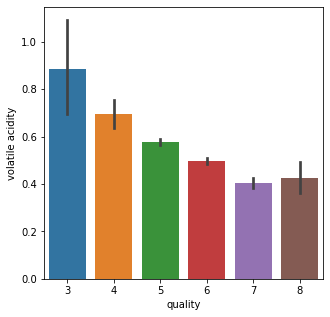

In [15]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = df)
plt.show()

We can see that, if voilatile acidity is high quality is low

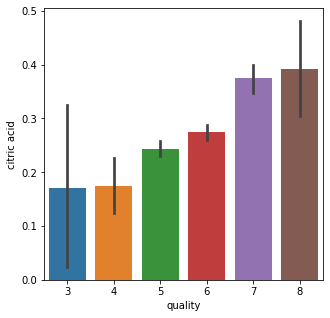

In [16]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data = df)
plt.show()

we can see that if citric acid is high...quality is also high

<AxesSubplot:>

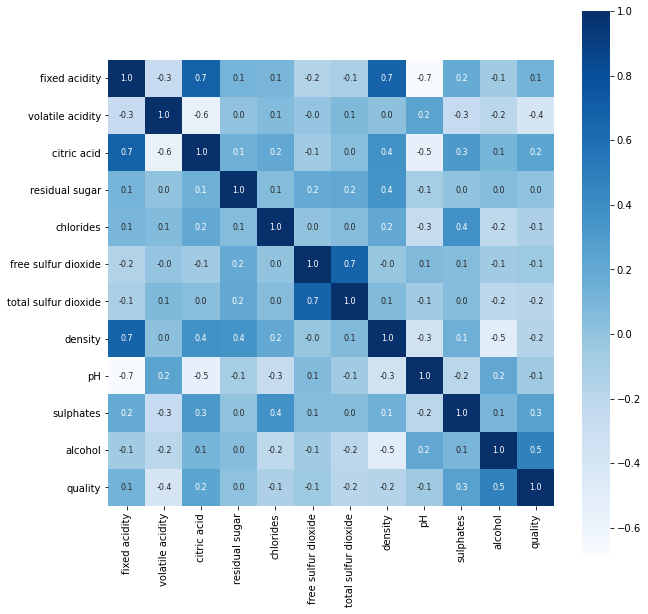

In [17]:
#correlation matrix
correlation = df.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

observe the quality column....darker cell(0.5) indicates positive correlation and lighter cell(-0.4) indicates negative correlation.

In [18]:
X = df.drop('quality', axis=1)
#Label Binarizaton....as we have multiple value in target col(quality)...
Y = df['quality'].apply(lambda i: 1 if i>=7 else 0)

In [19]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [47]:
#model training

model = RandomForestClassifier()

In [48]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [49]:
model.score(X_test, Y_test)

0.9

In [50]:
Y_predict = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict)
cm

array([[268,   3],
       [ 29,  20]], dtype=int64)

Text(69.0, 0.5, 'Truth')

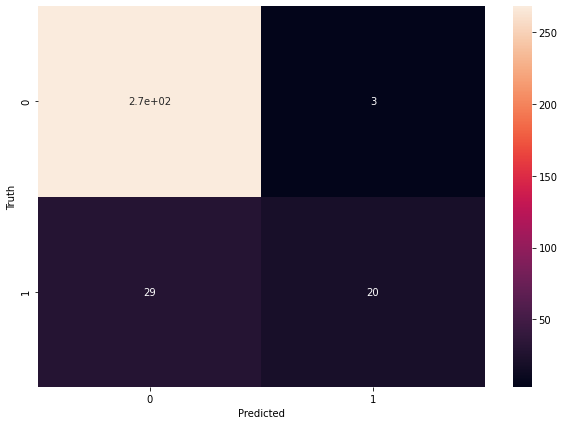

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
#predictor

input_data = tuple(df[df['quality'] == 5].iloc[0][:-1]) ##getting data of good wine quality
#print(input_data)
input_array = np.asarray(input_data)
input_reshaped = input_array.reshape(1,-1)
print(input_reshaped)

prediction = model.predict(input_reshaped)
print(prediction)

if prediction[0] == 0:
    print('Bad wine')
else:
    print('Good wine')

[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4   ]]
[0]
Bad wine


In [65]:
input_data1 = tuple(df[df['quality'] == 7].iloc[0][:-1]) #getting data of good wine quality(7 0r 8)
#print(input_data1)
input_array1 = np.asarray(input_data1)
input_reshaped1 = input_array1.reshape(1,-1)
print(input_reshaped1)

prediction1 = model.predict(input_reshaped1)
print(prediction1)

if prediction1[0] == 0:
    print('Bad wine')
else:
    print('Good wine')

(7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0)
[[ 7.3     0.65    0.      1.2     0.065  15.     21.      0.9946  3.39
   0.47   10.    ]]
[1]
Good wine
